## Verification Notebook

In [ ]:
from pathlib import Path
from PIL import Image
import numpy as nps
import matplotlib.pyplot as plt
import random

In [29]:
# Paths
PROCESSED_DIR = Path("../data/processed")
split = "train"   # or "test"

# Load available grayscale and color images
gray_dir = PROCESSED_DIR / split / "grayscale"
color_dir = PROCESSED_DIR / split / "color"

gray_files = list(gray_dir.glob("*.jpg"))
print(f"✅ Found {len(gray_files)} preprocessed grayscale images in {split}/grayscale/")
print(f"✅ Found {len(list(color_dir.glob('*.npy')))} color arrays in {split}/color/")

✅ Found 4995 preprocessed grayscale images in train/grayscale/
✅ Found 4995 color arrays in train/color/


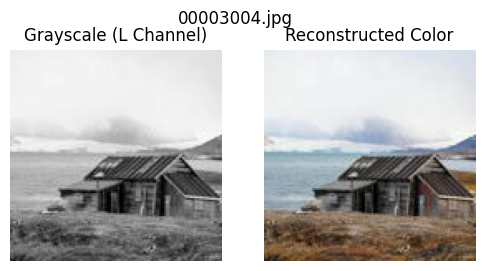

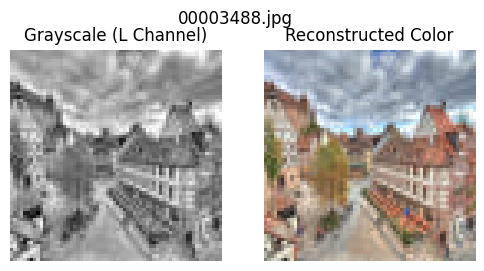

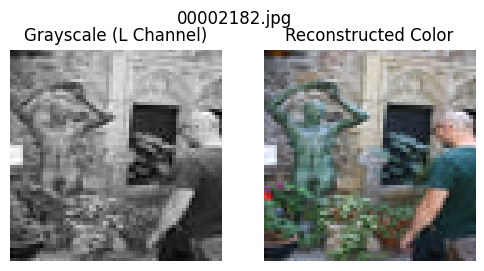

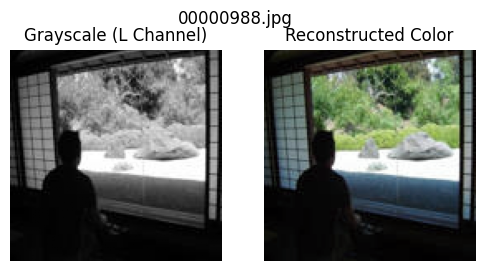

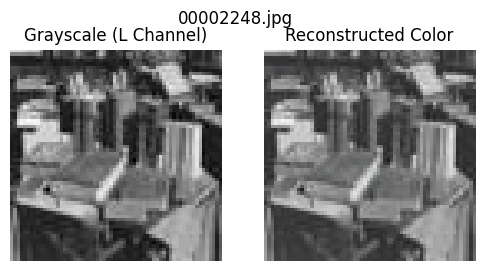

In [30]:
# Pick a few random grayscale images to verify
samples = random.sample(gray_files, min(5, len(gray_files)))

def visualize_sample(gray_path):
    """Visualize one preprocessed grayscale + AB pair"""
    # Load grayscale image (L channel)
    L = np.array(Image.open(gray_path)) / 255.0

    # Load corresponding color channels (AB)
    color_path = color_dir / gray_path.with_suffix(".npy").name
    AB = np.load(color_path)

    # Reconstruct LAB image
    LAB = np.zeros((L.shape[0], L.shape[1], 3))
    LAB[:, :, 0] = L * 255
    LAB[:, :, 1:] = AB * 128 + 128  # convert back to original LAB scale

    # Convert LAB -> RGB
    rgb_img = Image.fromarray(LAB.astype(np.uint8), mode="LAB").convert("RGB")

    # Show both grayscale and reconstructed color
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(L, cmap="gray")
    plt.title("Grayscale (L Channel)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(rgb_img)
    plt.title("Reconstructed Color")
    plt.axis("off")

    plt.suptitle(gray_path.name)
    plt.show()

# Visualize samples
for gray_path in samples:
    visualize_sample(gray_path)


In [31]:
# Quick data checks
gray_example = np.array(Image.open(samples[0])) / 255.0
ab_example = np.load(color_dir / samples[0].with_suffix(".npy").name)

print(f"L shape: {gray_example.shape}")
print(f"AB shape: {ab_example.shape}")
print(f"L range: {gray_example.min():.3f} → {gray_example.max():.3f}")
print(f"AB range: {ab_example.min():.3f} → {ab_example.max():.3f}")


L shape: (128, 128)
AB shape: (128, 128, 2)
L range: 0.000 → 1.000
AB range: 0.805 → 1.359


In [32]:
from IPython.display import display
import os

for split in ["train", "test"]:
    print(f"\n📁 {split.upper()} FOLDER STRUCTURE:")
    base = PROCESSED_DIR / split
    for root, dirs, files in os.walk(base):
        level = root.replace(str(base), "").count(os.sep)
        indent = " " * (4 * level)
        print(f"{indent}{Path(root).name}/")
        subindent = " " * (4 * (level + 1))
        for f in files[:5]:
            print(f"{subindent}{f}")



📁 TRAIN FOLDER STRUCTURE:
train/
    color/
        00000001.npy
        00000002.npy
        00000003.npy
        00000004.npy
        00000005.npy
    grayscale/
        00000001.jpg
        00000002.jpg
        00000003.jpg
        00000004.jpg
        00000005.jpg

📁 TEST FOLDER STRUCTURE:
test/
    color/
        Places365_val_00000004.npy
        Places365_val_00000010.npy
        Places365_val_00000021.npy
        Places365_val_00000027.npy
        Places365_val_00000050.npy
    grayscale/
        Places365_val_00000004.jpg
        Places365_val_00000010.jpg
        Places365_val_00000021.jpg
        Places365_val_00000027.jpg
        Places365_val_00000050.jpg
